## **Déroulé du projet de programmation - Darius NUBAN, Leah TOLEDANO**

# Partie I: choix du site et scrapping

- Nous avons commencé par scrapper le top 250 des films sur le site IMDB (https://www.imdb.com/fr/chart/top/). Mais nous avons réalisé que nous n'avions accès qu'à une petite partie des données car le site était protégé. Nous ne pouvions accèder qu'à 30 films, ce qui n'était pas interessant pour le projet d'analyse de données.



- Nous avons donc cherché un site moins protégé pour avoir un top de films et nous avons fini par utiliser le site SensCritique (https://www.senscritique.com/liste/les_250_films_a_voir_imdb_top_250/251213?page=6), qui en proposait 159. Nous avons tout de même du utiliser un faux agent et une pause temporelle (time.sleep(0.1)) pour pouvoir extraire les données.

L'exploitation de ces données a donc été plus fastidieuse que prévu.

### A. algorithme de scrapping

L'algorithme de scrapping est structuré de telle sorte:

- A partir de l'URL du site nous utilisons BeautifulSoup pour pouvoir traiter des données en format HTML du site.
- Nous créons une liste de films.
- Nous itérons sur cette liste: nettoyage et formatage de chaque catégorie d'information.
- Nous utilisons l'instance base de données et nous y insérons toutes les données nettoyées.

Nous collectons donc finalement les données: title, year, genre, duration, director, imdb_rating, rating_count et link. Cela nous permet déjà d'effectuer de nombreuses analyses intéressantes sur nos données. Nous aurions souhaité pouvoir accéder à des informations plus précises, notamment celles présentes sur les fiches techniques de chaque film mais nous n'avons pas réussi à trouver une méthode fonctionnelle pour changer de lien au cours de la boucle.

Notre piste était: 

            new_link = BASE_URL + f["href"] + "/details"
            response = requests.get(url)
            html = response.text
            soup_details = BeautifulSoup(requests.get(new_link, headers=headers).text, "html.parser")

            scenario_label = soup_details.find("span", string=lambda x: x and "Scénariste :" in x)
            production_label = soup_details.find("span", string=lambda x: x and "Producteurs :" in x)


            if scenario_label:
                scenario = scenario_label.find_next_sibling("td").text.strip()
            else:
                scenario = "N/A"
            if production_label:
                prod = production_label.find_next_sibling("td").text.strip()
            else:
                prod = "N/A"

Mais nous n'avons pas réussi à la faire fonctionner.

### B. Créer une classe pour gérer la database

Pour gérer l'insertion des films et des informations dans la database, nous avons créé une classe DatabaseManager.
Cette classe est surtout utile pour l'initialisation (connection à SQL et création d'une nouvelle table) et la fermeture (méthode close) d'une table SQL, visualisée sur DB Browser for SQLite.

Les autres méthodes de la classe sont:

&nbsp;&nbsp;&nbsp;&nbsp;- create_table: créer une table sous la forme adaptée pour notre travail, avec une colonne par catégorie

&nbsp;&nbsp;&nbsp;&nbsp;- insert_film: insertion des données dans la table.

# Partie 2: Analyse des données collectées

Nous avons ensuite transformé notre base de données en DataFrame, ce qui était particulièrement facilité par les méthodes de SQLite.

L'analyse de données menée ensuite nous a permis d'obtenir des statistiques diverses sur ce top de films. Les commentaires des graphes sont présents directement sur le fichier gg.ipynb

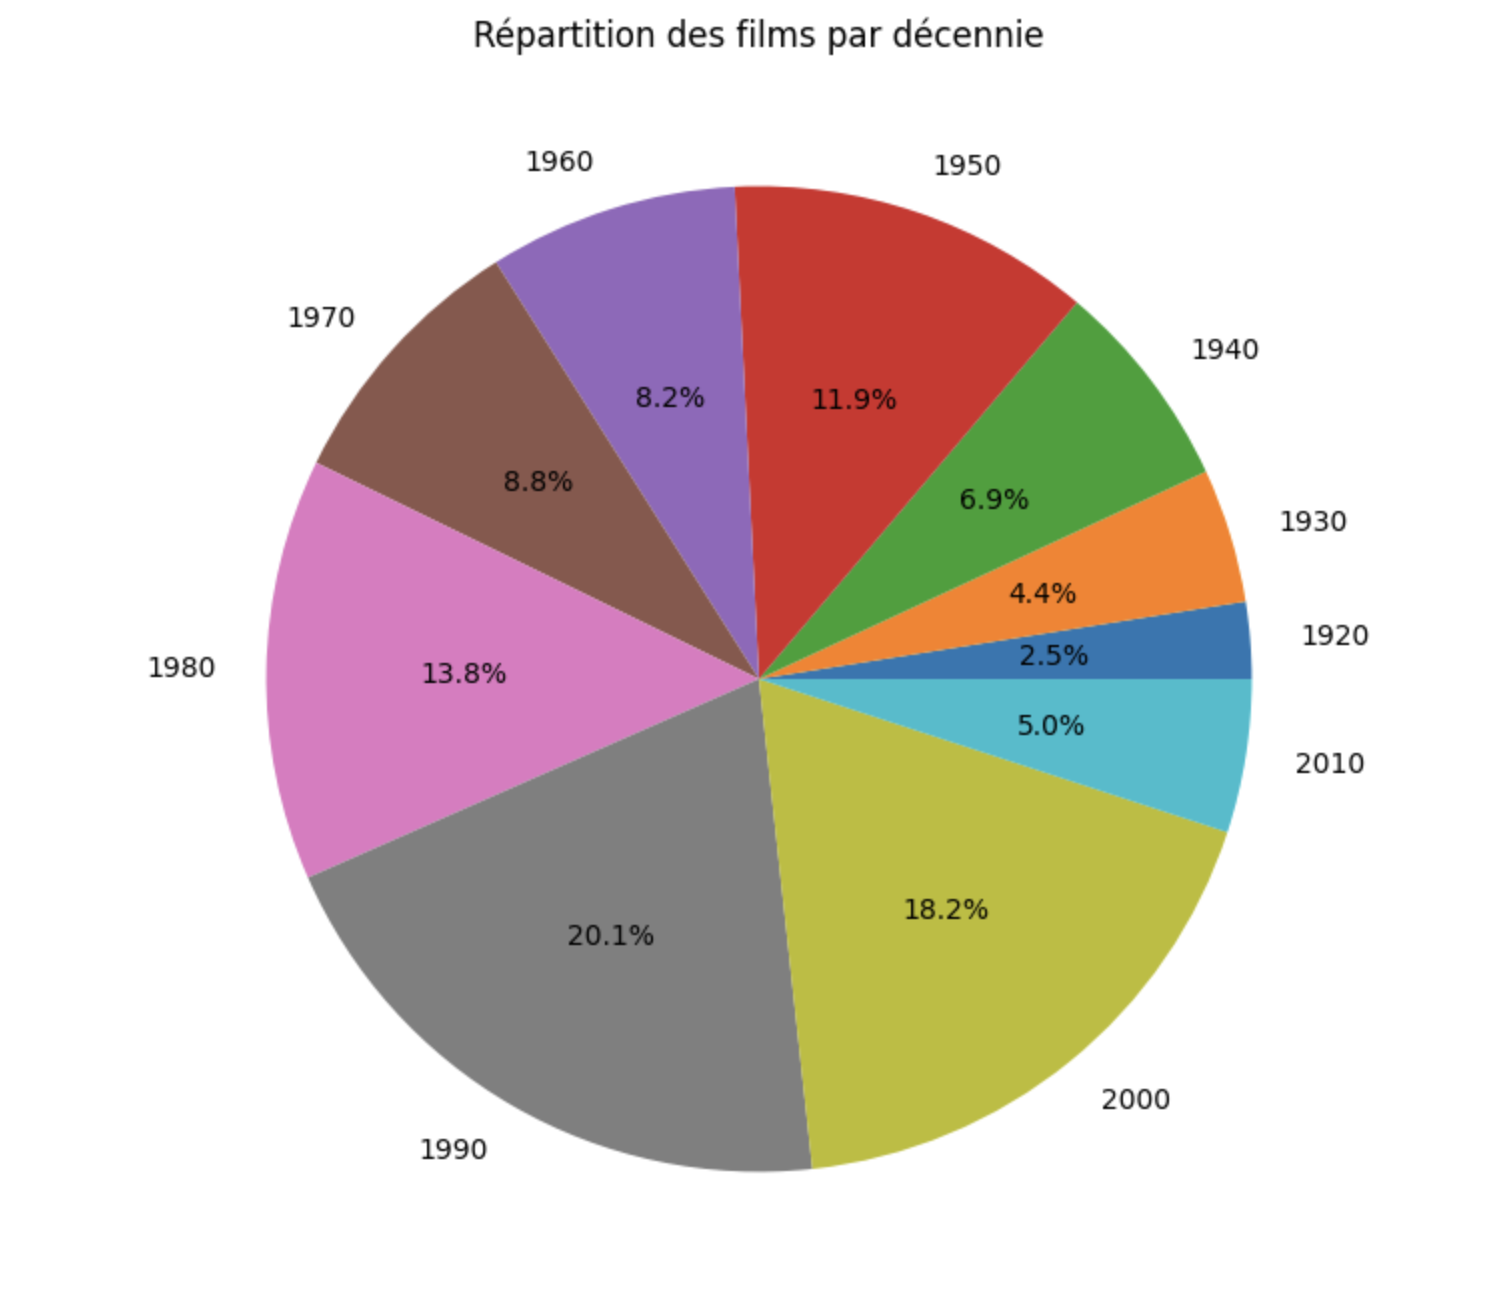

In [1]:
from IPython.display import Image, display

display(Image(filename="Capture d’écran 2026-01-21 à 17.24.30.png"))

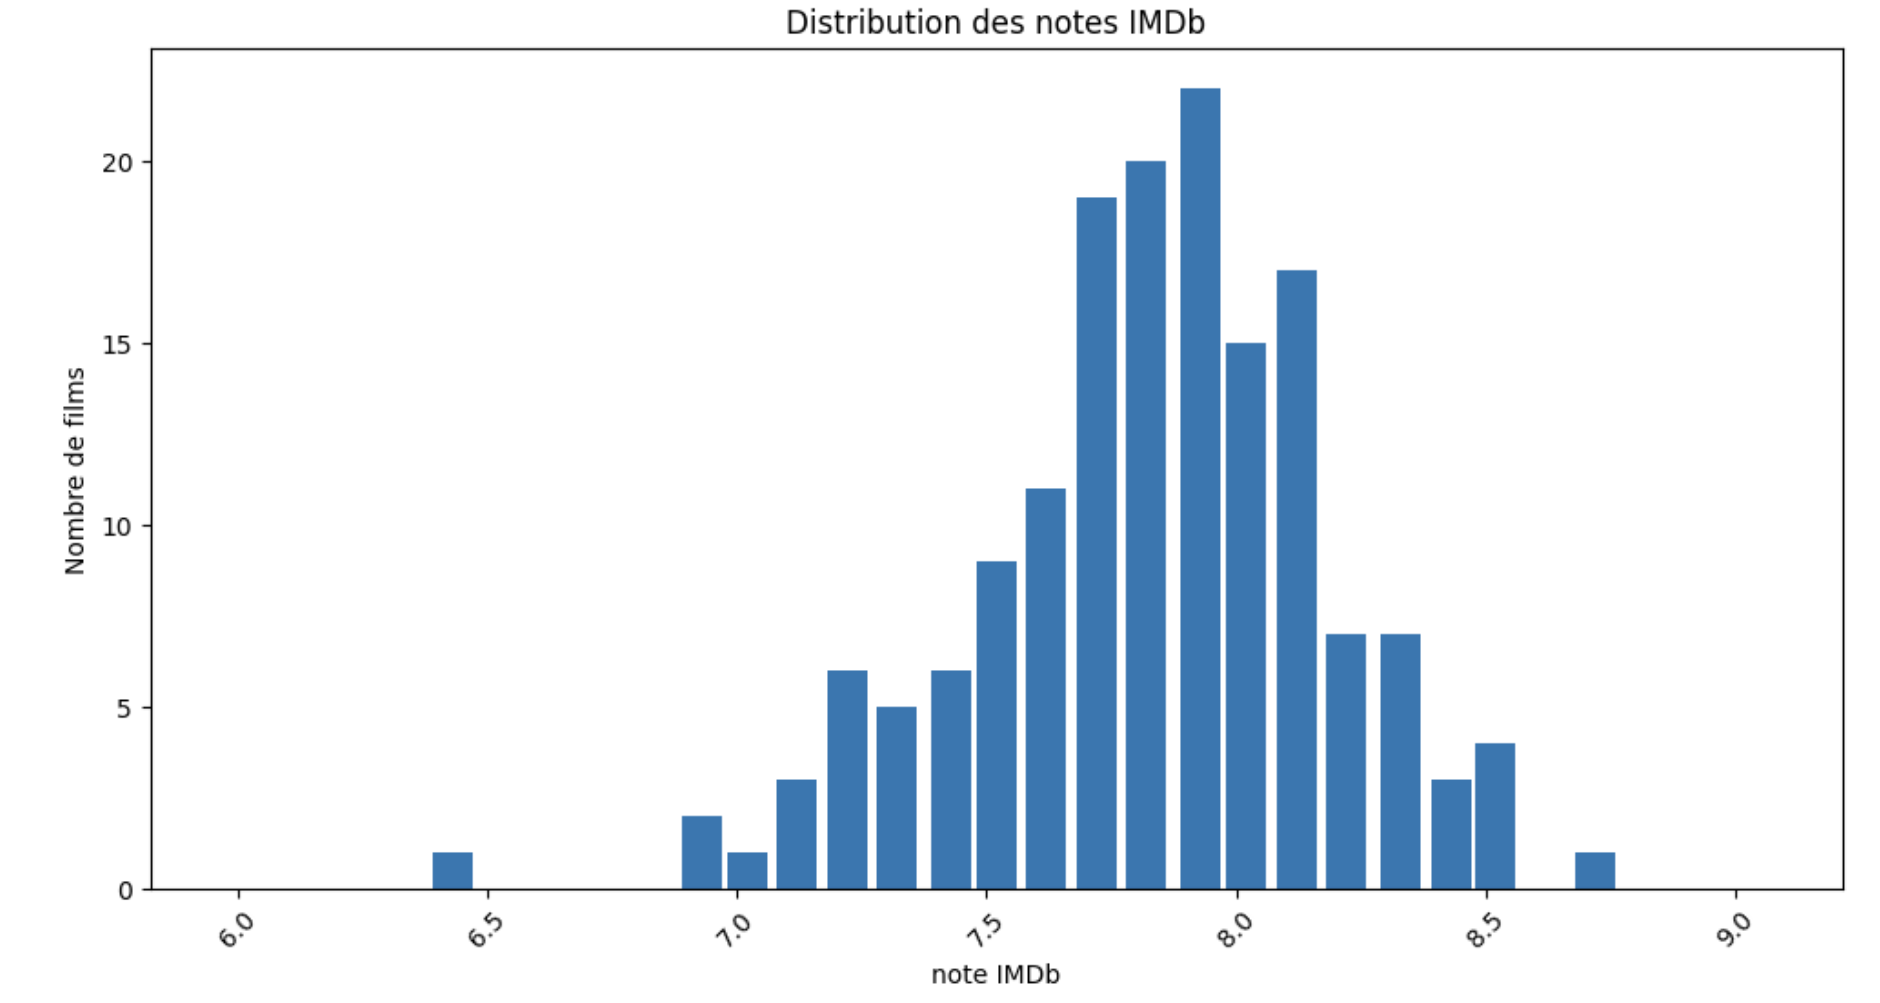

In [2]:
from IPython.display import Image, display

display(Image(filename="Capture d’écran 2026-01-21 à 17.25.19.png"))

Deux exemples de graphes présents dans l'analyse de données.

# Conclusion
